**Importing necessary libraries:**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from numpy import pi
import pandas as pd
from sklearn.linear_model import Ridge

**Plotting Bessel function $J_0$ (for n=0) for the interval (0,8):**

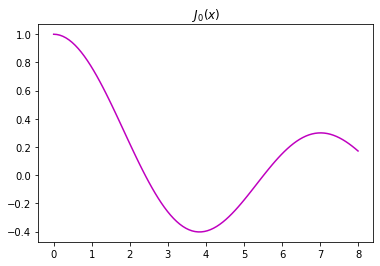

In [8]:
x = np.linspace(0, 8, 100)
bess0 = sp.jn(0,x)
plt.plot(x, bess0, color="m")
plt.title("$J_0 (x)$")
plt.show()

**Adding Gaussian noise to the function and plotting it for 5 different number of data points :**

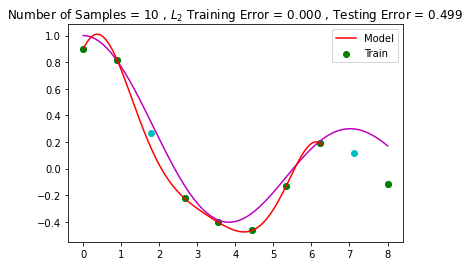

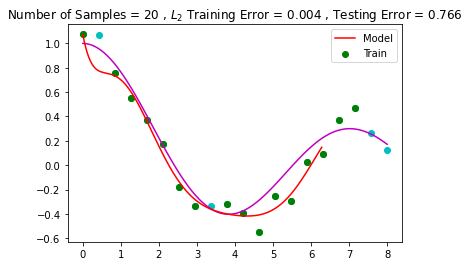

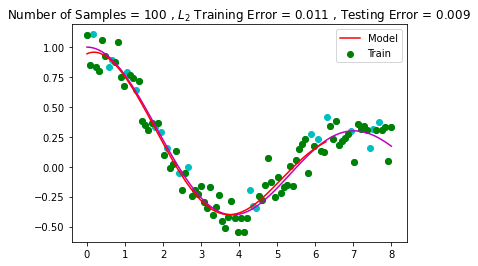

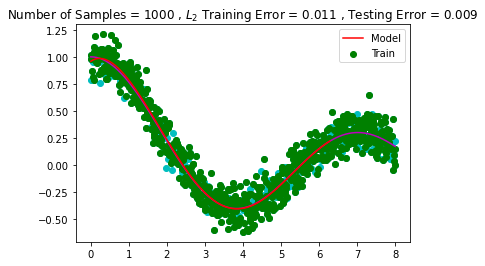

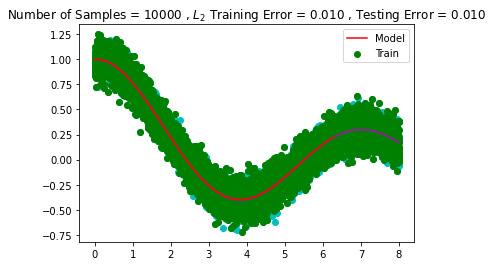

In [9]:
n = [10, 20, 100, 1000, 10000]
k = 0

for i in n:
  X = np.linspace(0, 8, i)
  y = sp.jn(0,X) + 0.1*np.random.normal(0, 1, i)
  plt.scatter(X, y, color="c")
  plt.title(i)
  plt.plot(x, bess0, color="m")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  model = make_pipeline(PolynomialFeatures(8), LinearRegression()) 
  X_train = X_train.reshape(-1, 1)
  X_test = X_test.reshape(-1, 1)
  model.fit(X_train, y_train)
  X_plot = np.arange(0, 2*pi, 0.01).reshape(-1, 1) 
  y_pred = model.predict(X_plot) 
  train_error = mean_squared_error(y_train, model.predict(X_train))
  test_error = mean_squared_error(y_test, model.predict(X_test))
  plt.title("Number of Samples = %.d , $ L_2 $ Training Error = %.3f , Testing Error = %.3f" %(i, train_error, test_error))
  plt.scatter(X_train,y_train, label="Train", color = "g")
  plt.plot(X_plot,y_pred, label="Model", color = "red")
  plt.legend(loc='best')
  plt.show()
